<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<span style="font-size: 16pt"> HW #7: CNN models

<span style="color:blue; font-size: 12pt">Sergey Kolesnikov</span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> scitator@gmail.com</span>


<h1 align="center">Organization Info</h1> 

* Дедлайн **27 апреля 2018 23:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями (<span style='color:red'> без присланного решения результат контеста не будет засчитан </span>).
* <span style='color:red'>Название команды в контесте должно соответствовать шаблону: НомерГруппы_Имя_Фамилия, например, 594_Ivan_Ivanov</span>.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task7.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

---

<h1 align="center">Check Questions </h1> 

Ниже приводится список вопросов, с ответами на которые может быть полезно разобраться для понимания темы.

**Вопрос 1**: Чем отличаются современные сверточные сети от сетей 5 летней давности?

*Ответ:*

- Сейчас их больше используют / они на слуху.

- Появились сетки намного большей глубины.

- Вместо $tanh$ и $sigmoid$ как функций активации стали использовать *ReLU* (скоратилось время на тренировку)

- Появились Batch_Normalization.


**Вопрос 2**: Какие неприятности могут возникнуть во время обучения современных нейросетей?

*Ответ:*

Нехватка вычислительных мощностей.



**Вопрос 3**: У вас есть очень маленький датасет из 100 картинок, классификация, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? что делать если первый вариант  решения не заработает?

*Ответ:*

Проблема с переобучением (слишком много параметров для тренировки).

Возможные решения:

- Использовать натренированную модель, которая решала похожую задачу классификации, применить ее.

- Увеличить датасет, воспользовавшись аугментацией.

- Использовать мало скрытых слоев (один)




**Вопрос 4**: Можно ли сделать стайл трансфер для музыки и как?

*Ответ:*

Можно. Получить из композиции спектрограмму (по горизонтальной оси - время, вертикальной - частота, цвет отвечает за мощность конкретной частоты).

Применить стайл трансфер для изображений.

---

<h1 align="center">Theory Questions</h1> 

---

### Useful notebooks
#### Colab link (seminar): https://colab.research.google.com/drive/18xjvLspViCwTUXTBNiz_xKxlUblQuGPU
#### Colab link (hw): https://colab.research.google.com/drive/1FlYpA-JHCZ1UilPScC2zWhZNCkE3Sv78

---

# CIFAR Quest

(please read it at least diagonally)

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.
* There is a __mini-report__ at the end that you will have to fill in. We recommend reading it first and filling it while you iterate.
 
## Grading
* starting at zero points
* +2 for describing your iteration path in a report below.
* +2 for correct check questions
* +1 for beating each of these milestones on __TEST__ dataset:
    * 60% (5 total)
    * 65% (6 total)
    * 70% (7 total)
    * 75% (8 total)
    * 80% (9 total)
    * 82% (10 total)
* +2 for really cool solution:
    * 84% (12 total)
    * 86% (14 total)
    * 88% (16 total)
    * 90% (18 total)
    * 92% (20 total)
    
## Bonus points

Common ways to get bonus points are:
* Get higher score, obviously.
* Anything special about your NN. For example "A super-small/fast NN that gets 80%" gets a bonus.
* Any detailed analysis of the results. (saliency maps, whatever)

## Restrictions
* Please do __NOT__ use pre-trained networks for this assignment.
 * In other words, milestones must be beaten without pre-trained nets (and such net must be present in the e-mail).
* you __can__ use validation data for training, but you __can't'__ do anything with test data apart from running the evaluation procedure.

---

In [1]:
# Load data. It may work slow.
!mkdir cifar10
!curl -o cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz -C cifar10

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0  9250k      0  0:00:18  0:00:18 --:--:-- 6702k
cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [0]:
import _pickle as pickle
import os
import time
import numpy as np

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib.pyplot as plt
import seaborn
from IPython import display

%matplotlib inline

In [3]:
tf.__version__

'1.7.0'

In [4]:
tf.test.is_gpu_available()

True

In [0]:
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='iso-8859-1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [0]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

cifar10_dir = './cifar10/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

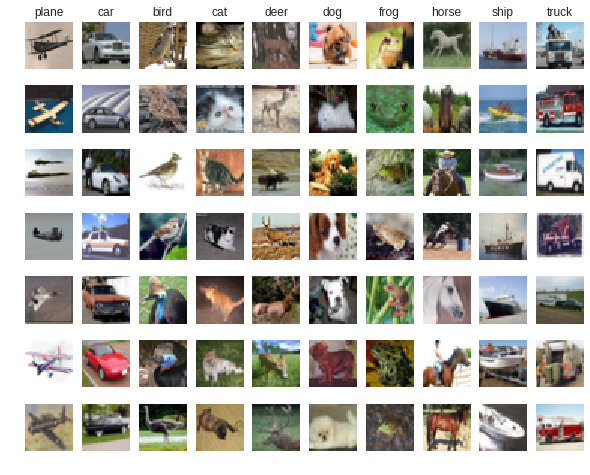

In [7]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8').transpose(1, 2, 0))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [0]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [0]:
def beutiful_graphic(a, b, labels, title):
    plt.figure(figsize=(14, 7))     
    plt.title(title)
    plt.xlabel("epoch")
    plt.ylabel(title)
    plt.plot(a, label=labels[0])
    plt.plot(b, label=labels[1])
    plt.legend()
    plt.show()

In [0]:
def cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
    
    input_layer = tf.reshape(features["x"], [-1, 32, 32, 3])
    input_layer = tf.cast(input_layer, tf.float32)
    
    
    def layers_block(input_layer_, filters_, type_, conv_num_):
        conv1 = tf.layers.conv2d(inputs=input_layer_, 
                                 filters=filters_, 
                                 kernel_size=[3, 3], 
                                 padding="same",
                                 activation=tf.nn.relu)
    
        norm1 = tf.layers.batch_normalization(conv1)
        
        conv2 = tf.layers.conv2d(inputs=norm1,
                                 filters=filters_,
                                 kernel_size=[3, 3],
                                 padding="same",
                                 activation=tf.nn.relu)
        
        norm2 = tf.layers.batch_normalization(conv2)
        
        if (conv_num_ == 3):
            conv3 = tf.layers.conv2d(inputs=norm2,
                                     filters=filters_,
                                     kernel_size=[3, 3],
                                     padding="same",
                                     activation=tf.nn.relu)
        
            norm3 = tf.layers.batch_normalization(conv3)
                       
            norm2 = norm3
            
        if (type_ == "max"):
            pool = tf.layers.max_pooling2d(inputs=norm2,
                                           pool_size=[2, 2],
                                           strides=2)
        else:
            pool = tf.layers.average_pooling2d(inputs=norm2,
                                               pool_size=[2, 2],
                                               strides=2)
        
        dropout = tf.layers.dropout(inputs=pool,
                                    rate=0.4,
                                    training=mode == tf.estimator.ModeKeys.TRAIN)
        
        return dropout
    
    
    block1 = layers_block(input_layer, 32, "average", 2)
    block2 = layers_block(block1, 64, "average", 2)
    
    flat = tf.reshape(block2, [-1, 8 * 8 * 64])
    
    norm = tf.layers.batch_normalization(flat)
  
    dropout = tf.layers.dropout(inputs=norm, 
                                rate=0.55,
                                training=mode == tf.estimator.ModeKeys.TRAIN)
    
    logits = tf.layers.dense(inputs=dropout, 
                             units=10)
    
    predictions = {
        "classes": tf.argmax(input=logits, axis=1),
    }

    # PREDICT mode
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, 
                                          predictions=predictions)
      
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    
    # TRAIN mode
    if mode == tf.estimator.ModeKeys.TRAIN:    
        optimizer = tf.train.AdamOptimizer(learning_rate=0.001,
                                           epsilon=0.01)

        train_op = optimizer.minimize(loss=loss,
                                      global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, 
                                          loss=loss,
                                          train_op=train_op)
      
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(labels=labels, 
                                        predictions=predictions["classes"])}
    
    # EVAL mode
    return tf.estimator.EstimatorSpec(mode=mode, 
                                      loss=loss, 
                                      eval_metric_ops=eval_metric_ops)

In [0]:
cifar10_clf = tf.estimator.Estimator(model_fn=cnn_model_fn,
                                     model_dir="/tmp/cifar10/" + time.strftime("%b_%d_%H_%M_%S", time.gmtime()))

In [0]:
epochs=150
batch_size=128

X_train /= 255
X_test /= 255

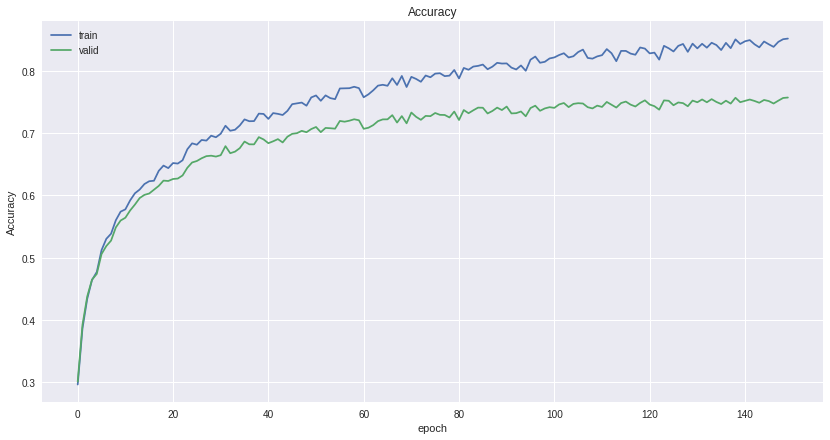

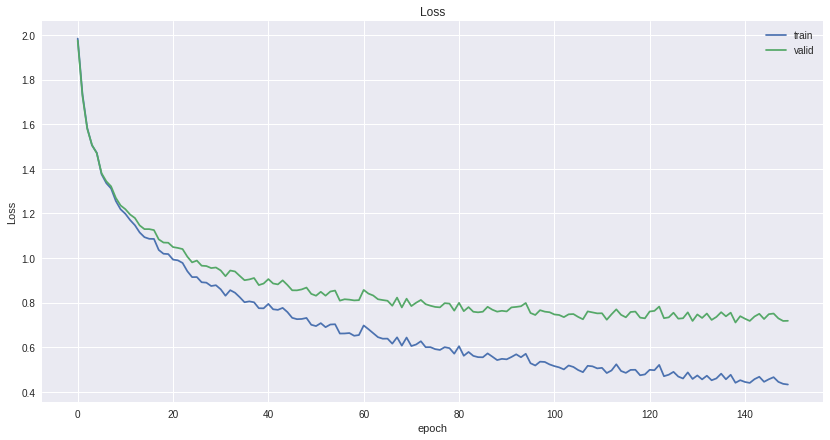

Epoch 150 of 150 took 23.223s
  train loss:		0.432157
  train accuracy:		85.19 %
  valid loss:		0.717910
  valid accuracy:		75.72 %


In [13]:
history = {"train_acc" : [], "train_loss" : [], 
           "valid_acc" : [], "valid_loss" : []}

train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": X_train},
                                                    y=y_train,
                                                    batch_size=batch_size,
                                                    num_epochs=1,
                                                    shuffle=True)

eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": X_test},
                                                       y=y_test,
                                                       num_epochs=1,
                                                       shuffle=False)

for epoch in range(epochs):
    start_time = time.time()
    
    cifar10_clf.train(input_fn=train_input_fn)
    
    train_results = cifar10_clf.evaluate(input_fn=train_input_fn)
    eval_results = cifar10_clf.evaluate(input_fn=eval_input_fn)
    
    history["train_acc"].append(train_results["accuracy"])
    history["train_loss"].append(train_results["loss"])
    
    history["valid_acc"].append(eval_results["accuracy"])
    history["valid_loss"].append(eval_results["loss"])
    
    
    display.clear_output(wait=True)
    
    beutiful_graphic(history["train_acc"], history["valid_acc"], 
                     labels=["train", "valid"], 
                     title="Accuracy")
    
    beutiful_graphic(history["train_loss"], history["valid_loss"], 
                     labels=["train", "valid"],
                     title="Loss")
    
    print("Epoch {} of {} took {:.3f}s".format(epoch + 1, epochs, time.time() - start_time))
    print("  train loss:\t\t{:.6f}".format(train_results["loss"]))
    print("  train accuracy:\t\t{:.2f} %".format(train_results["accuracy"] * 100))
    
    print("  valid loss:\t\t{:.6f}".format(eval_results["loss"]))
    print("  valid accuracy:\t\t{:.2f} %".format(eval_results["accuracy"] * 100))

In [14]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": X_test},
                                                       num_epochs=1,
                                                       shuffle=False)

gen = cifar10_clf.predict(input_fn=eval_input_fn)

y_pred = np.zeros(X_test.shape[0], dtype=int)

for i, element in enumerate(list(gen)):
    y_pred[i] = element["classes"]

from sklearn.metrics import accuracy_score

print("Final score: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))

Final score: 75.72 %


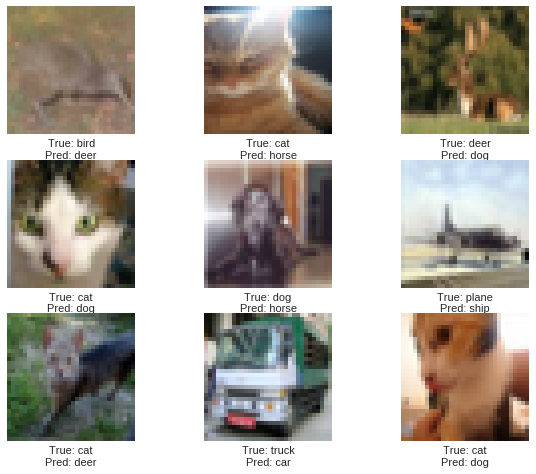

In [25]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

incorrect = []
for i, el in enumerate(y_pred):
    if (el != y_test[i]):
        incorrect.append(i)

incorrect = np.random.choice(incorrect, 9, replace=False)
images = X_test[incorrect] * 255
labels_true = y_test[incorrect]
labels_pred = y_pred[incorrect]

      
fig, axes = plt.subplots(3, 3)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i, :, :, :].astype('uint8').transpose(1, 2, 0))
            
    true_name = classes[labels_true[i]]
    
    pred_name = classes[labels_pred[i]]

    xlabel = "True: {}\nPred: {}".format(true_name, pred_name)

    ax.set_xlabel(xlabel)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

*Ну что ж, $75 \%$... *

*Получилось не очень. Барьер в кажущиеся не большими $82$ так и не преодолен.*

*Начиналось все довольно безобидно.*

Простейшая сеть conv + max_pool + Adagrad - $45 \%$ accuracy. Большое расхождение между train и val, переобучался уже после 10 эпохи. Добавил dense + dropout. Добавил dense + dropout. Добавил еще conv + maxpool. Добавил dropout после каждого conv слоя и стал ждать - получил примерно $60 \%$.

---

Прочитал про oprimizerы и протестировал на этой сети градиентные методы RMS, Adagrad, Adam. Сходятся в итоге почти одинаково. Остановился на последнем, т.к. он хорошо работает и со стандартными параметрами.

Одновременно попробовал ручками изменять learning_rate после конкретных эпох, ничего хорошего (да и плохого) не произошло -> положился на optimizer. 

---

Узнал про Batch_Normalization. Если все используют, почему и мне не попробовать? Небольшой прирост в скорости есть. Если их убрать совсем или заменить на dropout(0.1 - 0.2) точность падает. Попробовал поставить сначала conv -> norm -> non_linear - стало хуже

---

Перечитал про Adam, можно поэкспериментировать с epsilon, влияющем на смену весов. Так, для ImageNet оптимальное значение $1$. Остановился на $0.01$.  

---

Увидел повторяющуюся во многих статьях схему, состоящую из Conv + Conv + (Conv - не всегда) + Pool. Вынес в отдельный блок и стал эксперементировать с количеством блоков и размером фильтров.

Использование количества фильтров $64$, $128$ вместо $32$, $64$ прироста точности не дает, только ухудшение во времени работы.

Пробовал добавлять dense слои после этих блоков (мы же все таки классифицировать хотим). Скор только хуже становится. 


*В результате*

Получилось несколько сетей похожей архитектуры, достигающих $70 - 75 \%$. Самая простая из них представлена выше.

Почему-то считал, что данные нормализованны. Ан нет, поделил все на 255. При больших эпохах, график получается более плавным.

---

*Что не получилось:*

Так и научился использовать аугментацию, при использовании ImageDataGenerator.flow google cloud отваливается, наверное не хватает памяти. Стоило переписать без estimator, но так и не сделал.

В этот раз не было каких-то структурированных действий, многие изменения / попытки были довольно хаотичны. В итоге времени потрачено не соразмерно много по отношению к результату.

Были попытки запустить сетки, описанные на просторах интернета. Но все они выдают результат хуже, чем заявленный.

Итоговая сеть:

AdamOptimizer(epsilon=0.01)

epoches = 150

batch_size = 128

kernel_size = 3*3

pool_size = 2*2

Conv(32) + 
RELU + 
Batch + 
Conv(32) + 
ReLU + 
Batch + 
Average_pool + 
Dropout(0.4)

Conv(64) + 
RELU + 
Batch + 
Conv(64) + 
ReLU + 
Batch + 
Average_pool + 
Dropout(0.4)

reshape + 
Batch + 
dropout(0.55) + 
dense(10) + 
SoftMax
